In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input,train_target),(test_input,test_target)=keras.datasets.fashion_mnist.load_data()

train_scaled=train_input.reshape(-1,28,28,1)/255.0
train_scaled,val_scaled,train_target,val_target=train_test_split(train_scaled,train_target,test_size=0.2,random_state=42)

4431872/4422102 [==============================] - 0s 0us/step


In [2]:
model=keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=3,activation='relu',padding='same',input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

In [4]:
keras.utils.plot_model(model)
keras.utils.plot_model(model,show_shapes=True,to_file='cnn-architecture.png',dpi=300)

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-cnn-model.h5',save_best_only=True)
early_stopping_cb=keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)

history=model.fit(train_scaled,train_target,epochs=20,validation_data=(val_scaled,val_target),callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 19s 5ms/step - loss: 0.5288 - accuracy: 0.8097 - val_loss: 0.3406 - val_accuracy: 0.8708
Epoch 2/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3488 - accuracy: 0.8755 - val_loss: 0.2732 - val_accuracy: 0.8961
Epoch 3/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3024 - accuracy: 0.8914 - val_loss: 0.2581 - val_accuracy: 0.9038
Epoch 4/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2698 - accuracy: 0.9018 - val_loss: 0.2379 - val_accuracy: 0.9113
Epoch 5/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2427 - accuracy: 0.9112 - val_loss: 0.2395 - val_accuracy: 0.9101
Epoch 6/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2244 - accuracy: 0.9178 - val_loss: 0.2250 - val_accuracy: 0.9184
Epoch 7/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2068 - accuracy: 0.9231 - val_loss: 0.2266 - val_accuracy

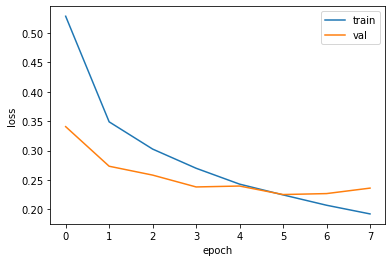

In [6]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

375/375 [==============================] - 1s 2ms/step - loss: 0.2250 - accuracy: 0.9184


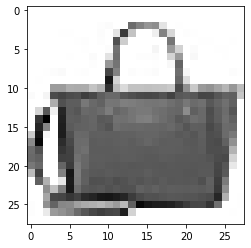

In [7]:
model.evaluate(val_scaled,val_target)

plt.imshow(val_scaled[0].reshape(28,28),cmap='gray_r')
plt.show()

In [8]:
preds=model.predict(val_scaled[0:1])
print(preds)

[[8.14965974e-16 8.30648671e-19 1.04289377e-16 6.74754810e-16
  4.59762072e-16 1.49732900e-11 1.59986185e-15 1.11280061e-12
  1.00000000e+00 2.18515082e-15]]


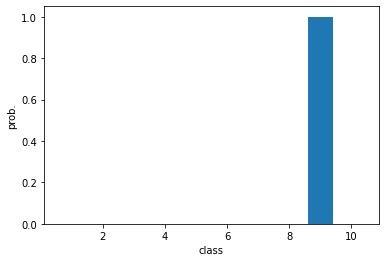

In [9]:
plt.bar(range(1,11),preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [10]:
classes=['티셔츠','바지','스웨터','드레스','코트','샌달','셔츠','스니커즈','가방','앵클 부츠']

import numpy as np
print(classes[np.argmax(preds)])

test_scaled=test_input.reshape(-1,28,28,1)/255.0

model.evaluate(test_scaled,test_target)
                        

가방
313/313 [==============================] - 1s 3ms/step - loss: 0.2482 - accuracy: 0.9123


[0.248223215341568, 0.9122999906539917]